<h2 align="center" style="color:brown; font-size:200%; font-weight:bold;">Lab 6: Histogram Matching</h2>



## **Introduction:**

In digital image processing, **histogram matching** (also known as **histogram specification**) is a technique that adjusts the pixel values of an image so that its histogram closely matches the histogram of a reference image. This technique is used to enhance the visual appearance of an image or make it more consistent with a given target. Histogram matching has applications in various fields such as image enhancement, machine vision, and medical imaging. The main goal is to modify the source image's distribution of pixel intensities to resemble that of a reference image, thereby achieving a specified tonal range and contrast.

In this report, we use the Python libraries **`skimage`** and **OpenCV** to perform histogram matching between a source image and a reference image, then add a new image onto the matched image. We will demonstrate how to load images, perform histogram matching, and integrate another image using basic image processing techniques. The final objective is to blend the resulting image with a new one to achieve a visually pleasing effect.


## **Problem Statement:**

The main challenge in this task is to modify the **source image** in such a way that its histogram aligns with the **reference image**. The problem involves performing the following steps:

1. **Load the source and reference images**.
2. **Match the histogram** of the source image to that of the reference image.
3. **Visualize and compare histograms** across the three RGB channels (Red, Green, Blue).
4. **Add a new image** to the histogram-matched image.
5. **Display the final result**, along with the comparison of histograms before and after matching.

The key goal is to assess how effectively the histogram of one image can be transformed to resemble another, and to visually evaluate the impact of histogram matching on the source image.


## **Objectives:**

- To **apply histogram matching** using the `match_histograms()` function from the `skimage.exposure` module.
- To **compare histograms** of the source and reference images.
- To **add a new image** to the histogram-matched image.
- To **visualize the results**, including histograms and the final combined image.


## **Concepts Used:**

- **Histogram Matching**: Histogram matching is a technique used to adjust the intensity distribution of an image by modifying its histogram to match a reference image. This technique involves mapping the pixel values of the source image to the target values based on the reference histogram.

- **RGB Channels**: Images are often represented using three color channels: Red, Green, and Blue. These channels store the intensity of each color in the image. Histogram matching can be applied to each channel separately to align the overall color distribution.

- **skimage.exposure.match_histograms()**: This function from the `skimage` library performs histogram matching between two images. It transforms the source image such that its histogram matches the histogram of the reference image.

- **Image Blending**: Image blending is the process of combining two images into one, often using transparency or weighted averages. In this case, the `dancing_kid.jpg` image is added to the histogram-matched image to create a composite image.


In [1]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from skimage import exposure

In [2]:
# Load images using skimage.io.imread
source = io.imread('source.jpg')
reference = io.imread('reference.jpg')
dancing_kid = io.imread('dancing_kid.jpg')

In [3]:
# Checking source image type
if len(source.shape) == 2:
    if np.unique(source).size <= 2:
        print("Source image is Binary")
    else:
        print("Source image is Grayscale")
elif len(source.shape) == 3 and source.shape[2] == 3:
    print("Source image is RGB")
else:
    print("Source image is Unknown")

Source image is RGB


In [4]:

# Checking reference image type
if len(reference.shape) == 2:
    if np.unique(reference).size <= 2:
        print("Reference image is Binary")
    else:
        print("Reference image is Grayscale")
elif len(reference.shape) == 3 and reference.shape[2] == 3:
    print("Reference image is RGB")
else:
    print("Reference image is Unknown")

Reference image is RGB


In [5]:
# Checking dancing_kid image type
if len(dancing_kid.shape) == 2:
    if np.unique(dancing_kid).size <= 2:
        print("Dancing Kid image is Binary")
    else:
        print("Dancing Kid image is Grayscale")
elif len(dancing_kid.shape) == 3 and dancing_kid.shape[2] == 3:
    print("Dancing Kid image is RGB")
else:
    print("Dancing Kid image is Unknown")

Dancing Kid image is RGB


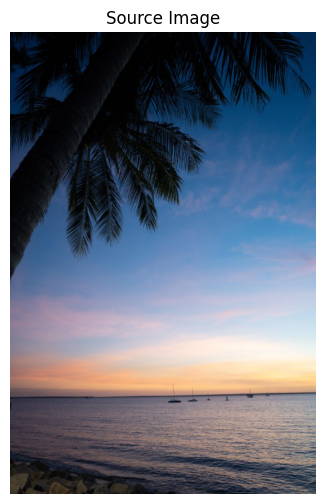

In [6]:
# Display Source Image
plt.figure(figsize=(12,6))
plt.imshow(source)
plt.title("Source Image")
plt.axis('off')
plt.show()

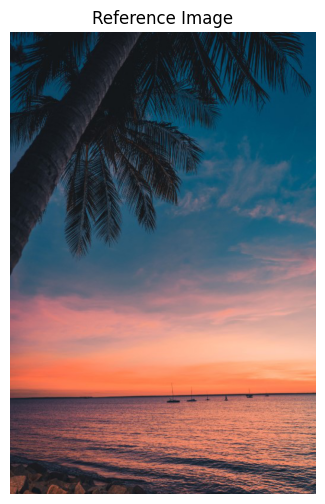

In [7]:
# Display Reference Image
plt.figure(figsize=(12,6))
plt.imshow(reference)
plt.title("Reference Image")
plt.axis('off')
plt.show()

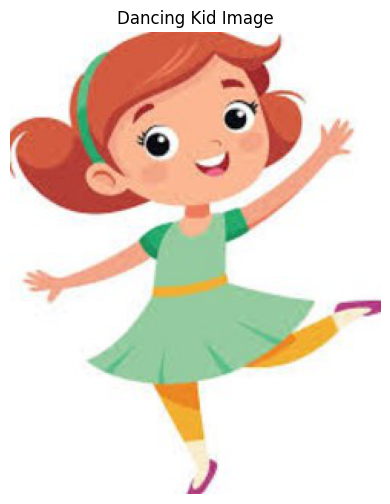

In [8]:
# Display Dancing Kid Image
plt.figure(figsize=(12,6))
plt.imshow(dancing_kid)
plt.title("Dancing Kid Image")
plt.axis('off')
plt.show()

## **a) Download and display the images ‘source.jpg’ and ‘reference.jpg’.**

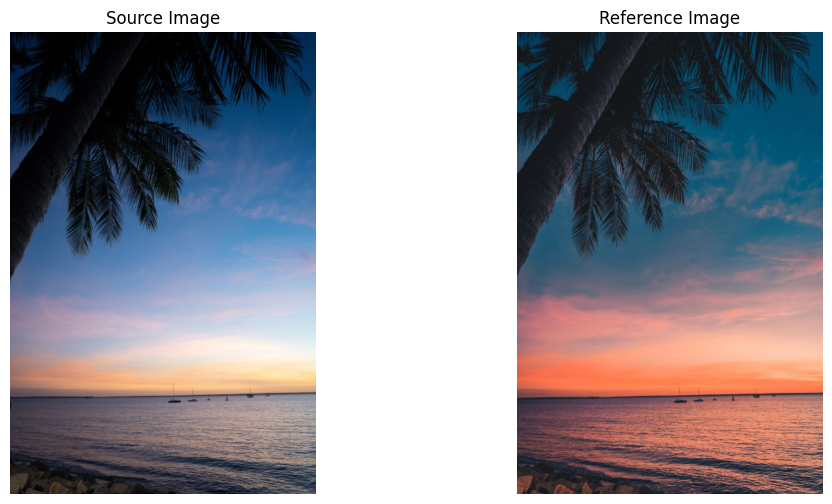

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2, 1)
plt.imshow(source)
plt.title("Source Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(reference)
plt.title("Reference Image")
plt.axis('off')

plt.show()

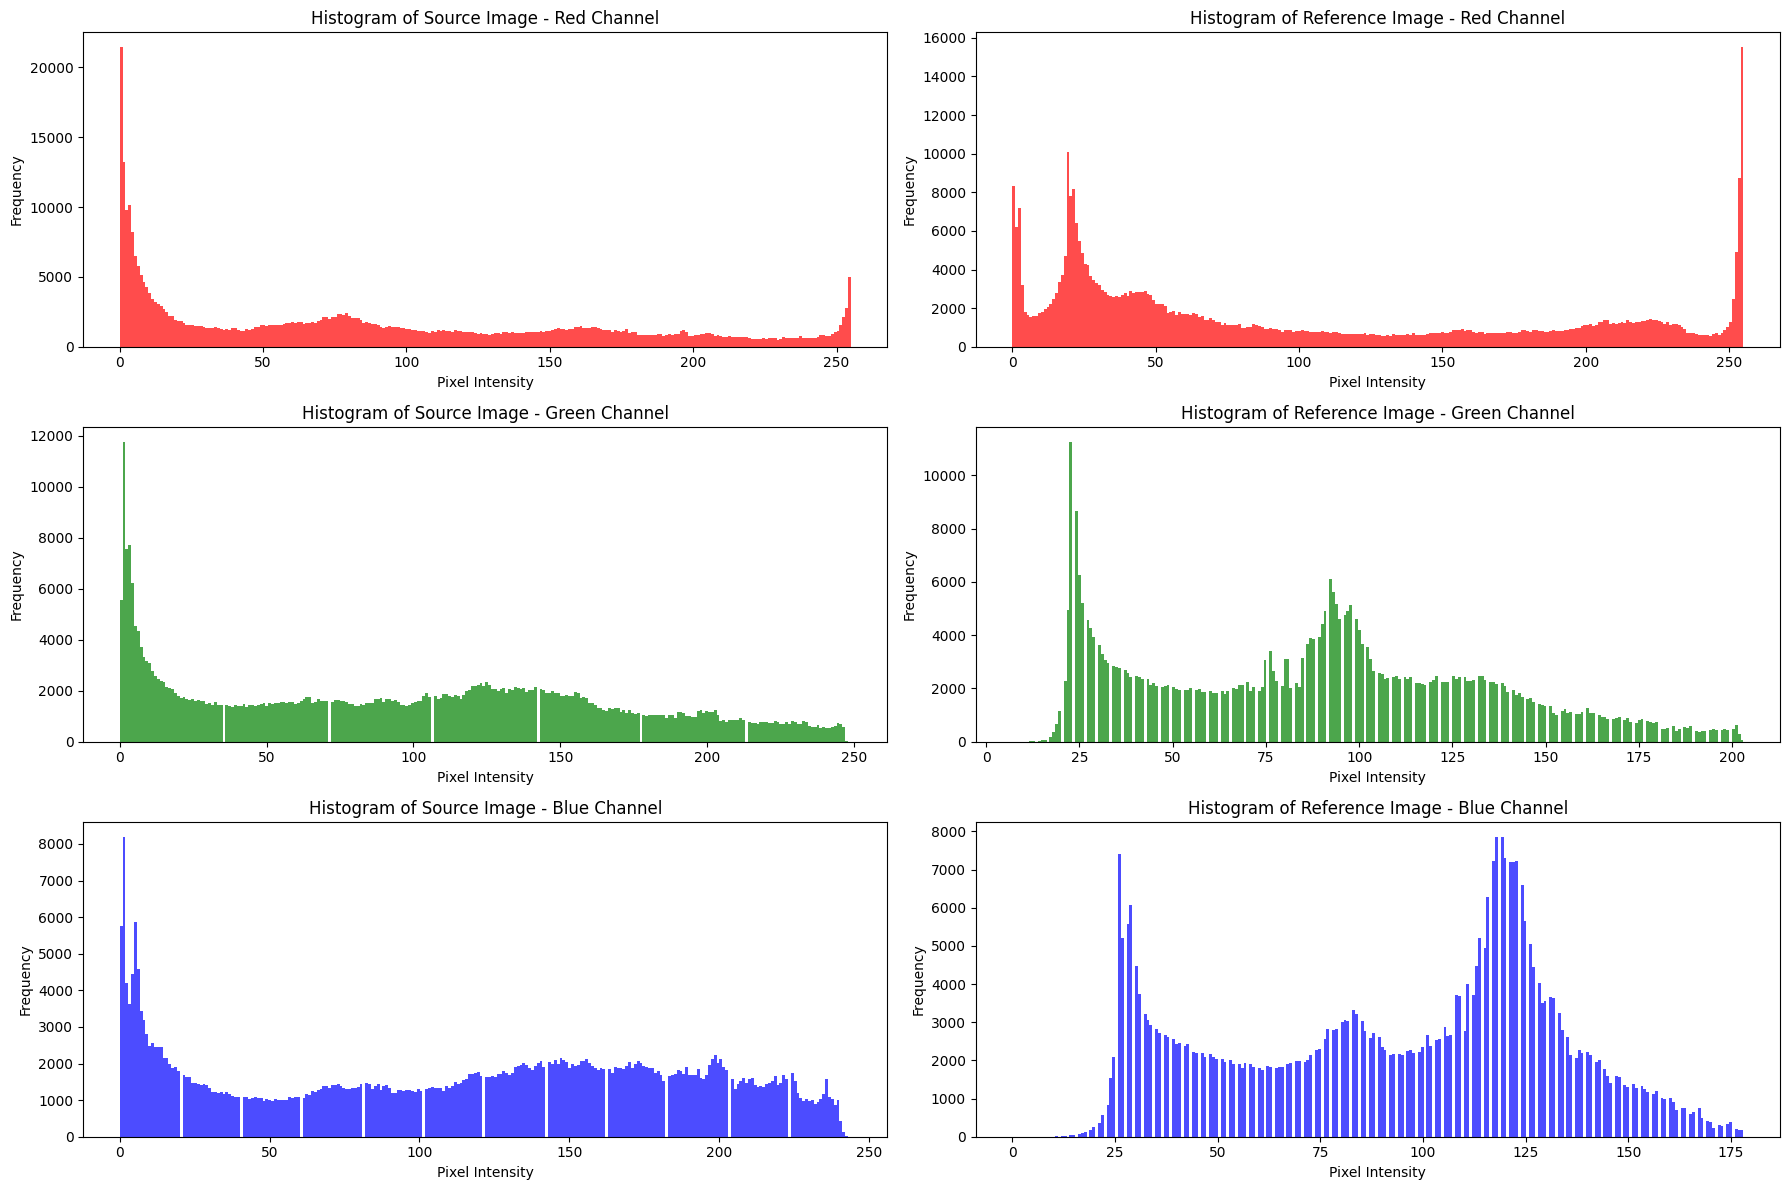

In [10]:
# Display histograms for Source and Reference Images in RGB channels
plt.figure(figsize=(18, 12))

# Plot histograms for the Source Image
for i, color in enumerate(['red', 'green', 'blue']):
    plt.subplot(3, 2, 2 * i + 1)
    plt.hist(source[:, :, i].ravel(), bins=256, color=color, alpha=0.7)
    plt.title(f"Histogram of Source Image - {color.capitalize()} Channel")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

# Plot histograms for the Reference Image
for i, color in enumerate(['red', 'green', 'blue']):
    plt.subplot(3, 2, 2 * i + 2)
    plt.hist(reference[:, :, i].ravel(), bins=256, color=color, alpha=0.7)
    plt.title(f"Histogram of Reference Image - {color.capitalize()} Channel")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## **Interpretation**:
- The histogram of the source image's red channel shows a heavy concentration towards lower intensity values, indicating that darker red tones dominate the image, with a small spike at the higher end suggesting occasional bright reds.
- The red channel in the reference image is more balanced, with peaks at mid-intensity levels and a strong spike near 255, representing a broader dynamic range and more vibrant reds.
- In the green channel, the source image has most pixel intensities clustered in the lower range, indicating a dominance of darker green shades with minimal representation of brighter greens.
- The reference image exhibits a wider distribution in the green channel, with peaks at various mid-intensity levels, suggesting the presence of both subtle and brighter green tones.
- For the blue channel, the source image shows a relatively even spread of intensities compared to the other channels but remains biased toward lower and moderate values, indicating a consistent, albeit subdued, blue tone across the image.
- The reference image's blue channel is more diverse, with distinct peaks at low, mid, and high intensity levels, showcasing a richer representation of blue shades.

## **Inference**:
- Overall, the source image is darker and has less color variation, with most intensities concentrated in the lower ranges across all channels.
- The reference image is brighter and more vibrant, with a broader and more balanced distribution of pixel intensities across the red, green, and blue channels.


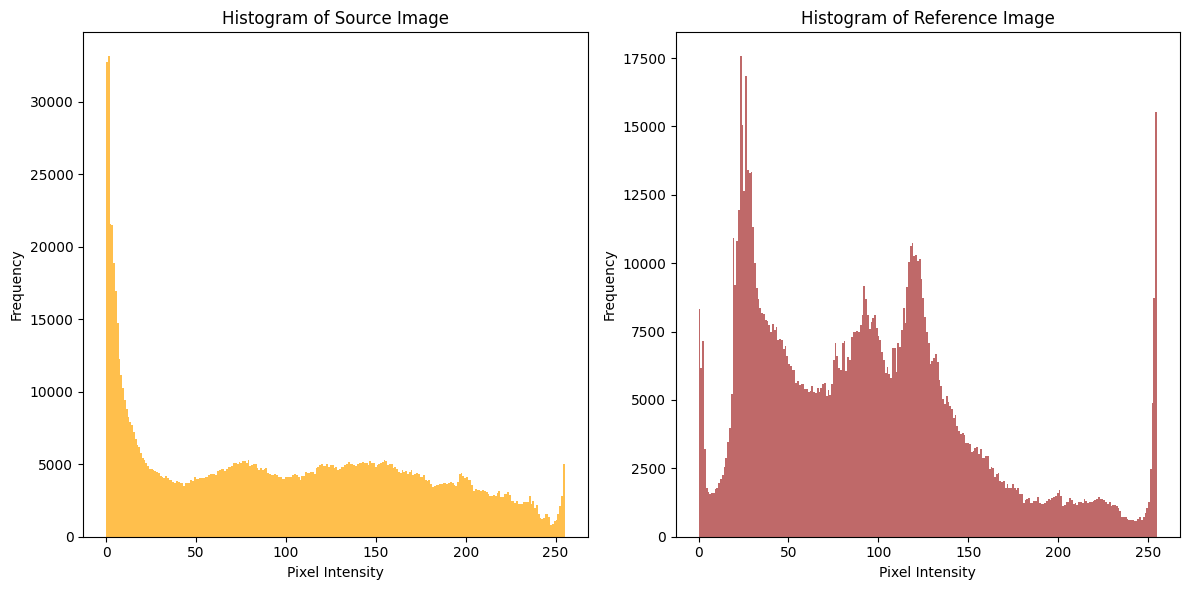

In [12]:
plt.figure(figsize=(12, 6))
# Display Histogram of Source Image (Grayscale or RGB)
plt.subplot(1, 2, 1)
plt.hist(source.ravel(), bins=256, color='orange', alpha=0.7)
plt.title("Histogram of Source Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Display Histogram of Reference Image (Grayscale or RGB)
plt.subplot(1, 2, 2)
plt.hist(reference.ravel(), bins=256, color='brown', alpha=0.7)
plt.title("Histogram of Reference Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## **Interpretation:**

- The source image has a histogram skewed to the left, indicating a higher proportion of pixels with lower intensity values, suggesting it is darker or has lower overall brightness.
- The reference image has a more evenly distributed histogram, with a peak around the middle range of intensity values, indicating a more balanced distribution of pixel intensities and suggesting a more evenly lit image.
- The peak of the histogram for the source image is around 0-25, meaning most of the pixels have very low intensity values.
- For the reference image, the peak is around 100-125, indicating that the reference image has a higher concentration of pixels with medium intensity values.
- The histogram of the source image extends up to around 200, showing a limited range of intensity values.
- The histogram of the reference image extends up to around 250, suggesting a wider range of intensity values, potentially including brighter areas.

## **Inference:**
- In summary, the source image appears darker with a narrower intensity range, while the reference image has a more balanced intensity distribution and a wider range, suggesting it is brighter and has more variation in lighting conditions.

## **b) Do histogram matching on ‘source.jpg’ by matching it to the histogram of ‘reference.jpg’.**


# **Histogram Matching:**

In [13]:
matched_image = exposure.match_histograms(source,reference, channel_axis=-1)  # Use channel_axis for RGB images

## **c) Display the histogram matched image.**

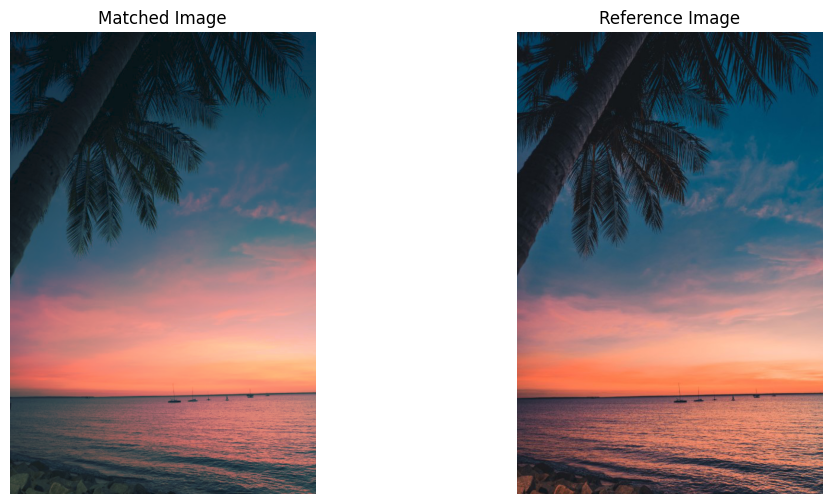

In [14]:
plt.figure(figsize=(12, 6))

# Display Source Image
plt.subplot(1,2, 1)
plt.imshow(matched_image)
plt.title("Matched Image")
plt.axis('off')

# Display Reference Image
plt.subplot(1, 2, 2)
plt.imshow(reference)
plt.title("Reference Image")
plt.axis('off')

plt.show()

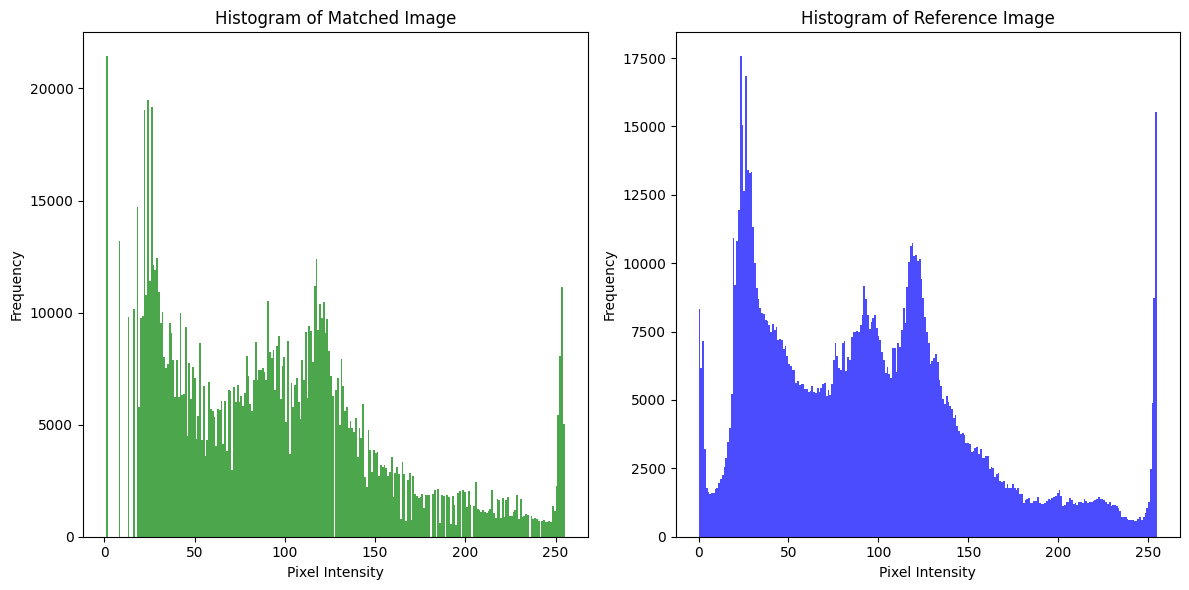

In [15]:
plt.figure(figsize=(12, 6))
# Display Histogram of Source Image (Grayscale or RGB)
plt.subplot(1, 2, 1)
plt.hist(matched_image.ravel(), bins=256, color='green', alpha=0.7)
plt.title("Histogram of Matched Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Display Histogram of Reference Image (Grayscale or RGB)
plt.subplot(1, 2, 2)
plt.hist(reference.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Histogram of Reference Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## **Comparison of Source, Matched and Reference image:**

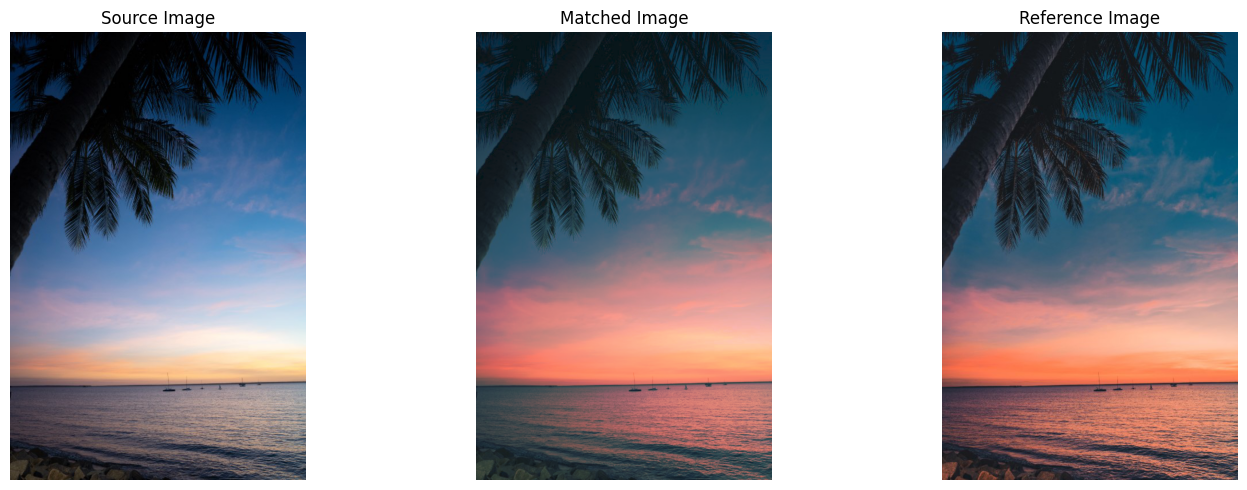

In [16]:
plt.figure(figsize=(15, 5))

# Display Source Image
plt.subplot(1, 3, 1)
plt.imshow(source)
plt.title("Source Image")
plt.axis('off')

# Display Matched Image
plt.subplot(1, 3, 2)
plt.imshow(matched_image)
plt.title("Matched Image")
plt.axis('off')

# Display Reference Image
plt.subplot(1, 3, 3)
plt.imshow(reference)
plt.title("Reference Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## **Interpretation:**

- The matched image has been successfully transformed to closely resemble the reference image in terms of color and contrast.
- The transformation has significantly improved the visual similarity between the source and reference images.
- The source image has been adjusted to match the warmer color palette of the reference image. The sky in the matched image now has a similar pinkish-orange hue to the reference image.
- The contrast of the matched image has been increased, making the details in the shadows and highlights more visible, similar to the reference image.
- The overall brightness of the matched image has been increased to better match the reference image.
- The matched image now appears more vibrant and visually appealing, similar to the reference image.
- The transformation has improved the overall mood and atmosphere of the image, making it more consistent with the reference image.
- The matching technique has effectively transformed the source image to closely resemble the reference image. The changes in color, contrast, and brightness have significantly improved the visual similarity between the two images.


## **d) Display the histogram of source, reference and matched images in all color channels.**

## **Histograms of Source, Reference, and Matched Images in RGB Channel individually:**

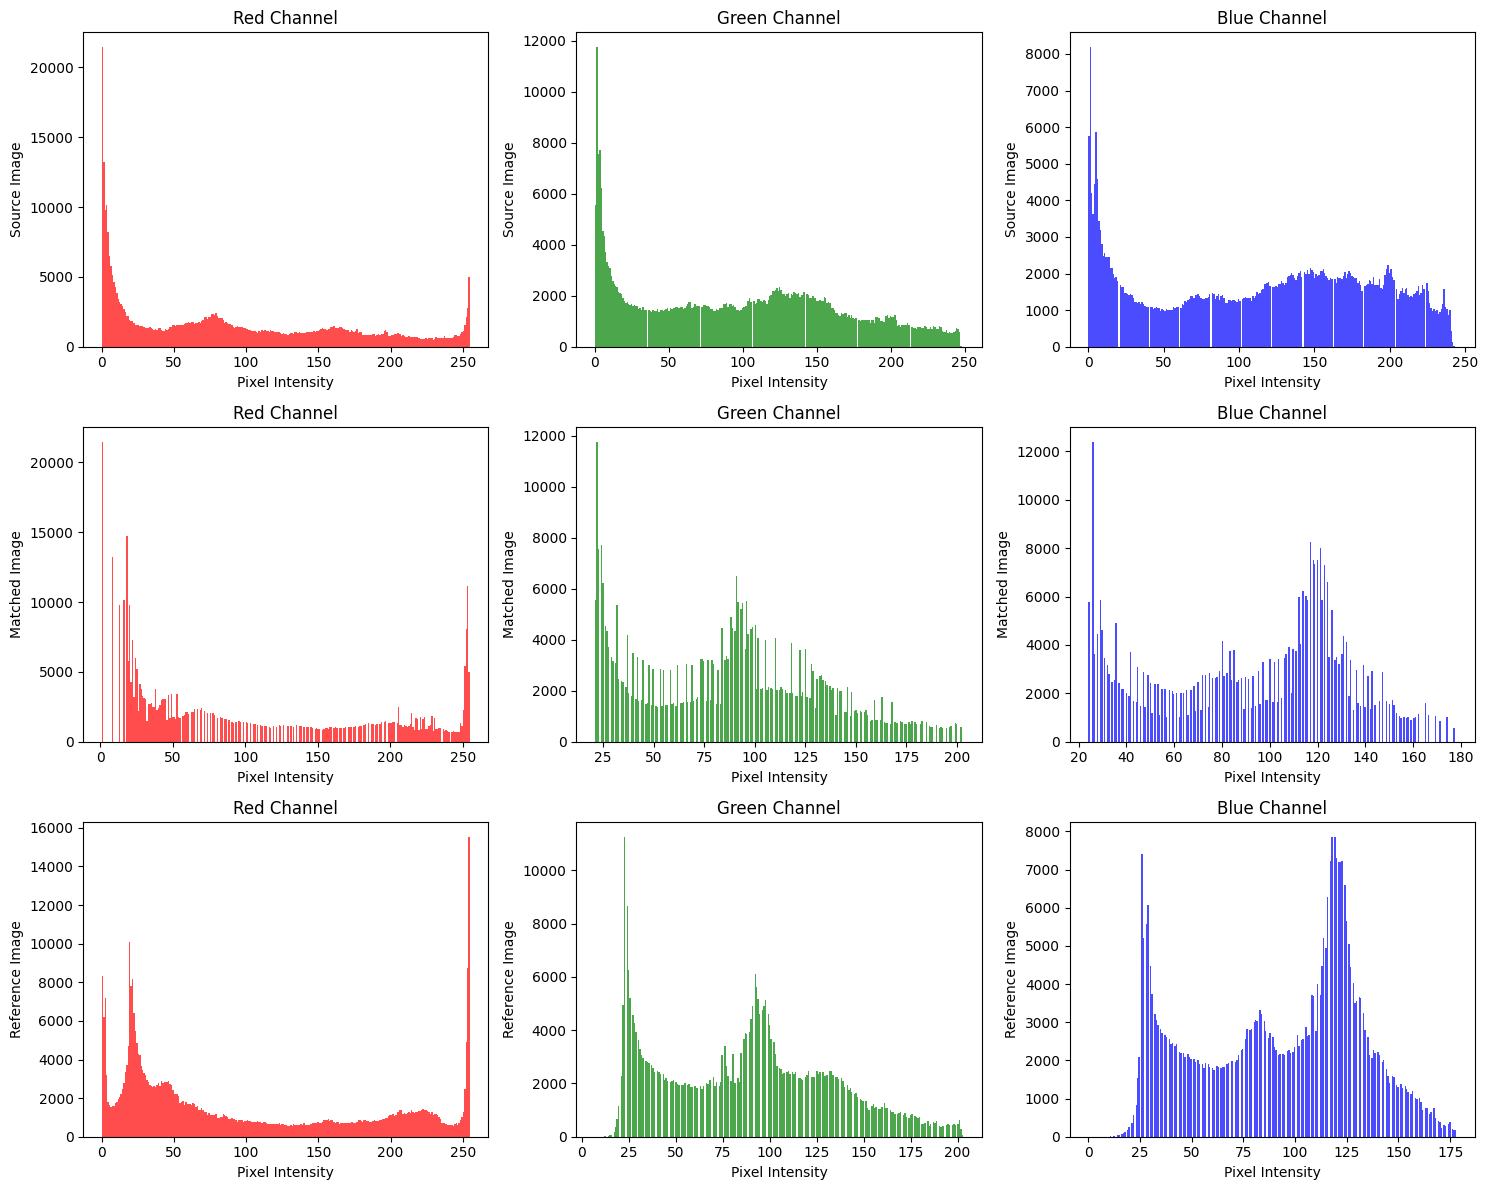

In [41]:
def plot_row_histograms(image, row_index):
    channels = ['Red', 'Green', 'Blue']
    colors = ['red', 'green', 'blue']
    for i, (channel, color) in enumerate(zip(channels, colors)):
        plt.subplot(3, 3, row_index * 3 + i + 1)  # Calculate the correct subplot index
        plt.hist(image[..., i].ravel(), bins=256, color=color, alpha=0.7)
        plt.title(f"{channel} Channel")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        if row_index == 0:
            plt.ylabel("Source Image")
        elif row_index == 1:
            plt.ylabel("Matched Image")
        elif row_index == 2:
            plt.ylabel("Reference Image")

plt.figure(figsize=(15, 12))
plot_row_histograms(source, row_index=0)
plot_row_histograms(matched_image, row_index=1)
plot_row_histograms(reference, row_index=2)
plt.tight_layout()
plt.show()

## **Interpretation:**

- The histogram matching technique has been effectively applied to the source image to align its color distribution with the reference image. This is evident from the significant changes observed in the histograms of the individual color channels (Red, Green, and Blue).
  
- The source image has a higher peak at lower intensity values in the red channel, indicating a higher proportion of darker red pixels.
  
- The matched image has a more balanced distribution in the red channel, with a peak shifted towards higher intensity values, similar to the reference image. This suggests that the histogram matching has increased the overall red intensity in the source image.
  
- In the green channel, the source image has a lower peak and a narrower distribution compared to the reference image.
  
- The matched image has a higher peak and a broader distribution in the green channel, closely resembling the reference image. This indicates that the histogram matching has increased the green intensity and its variation in the source image, making it appear more vibrant and similar to the reference image.
  
- In the blue channel, the source image has a lower peak and a narrower distribution compared to the reference image.
  
- The matched image has a higher peak and a broader distribution in the blue channel, closely resembling the reference image. This suggests that the histogram matching has increased the blue intensity and its variation in the source image, making it appear more similar to the reference image.

- The histogram matching technique has proven to be a powerful tool for color and intensity adjustments. By manipulating the distribution of pixel intensities in each color channel, it can significantly alter the overall appearance of an image.
  

## **Histograms of Source, Reference, and Matched Images in RGB Channel:**

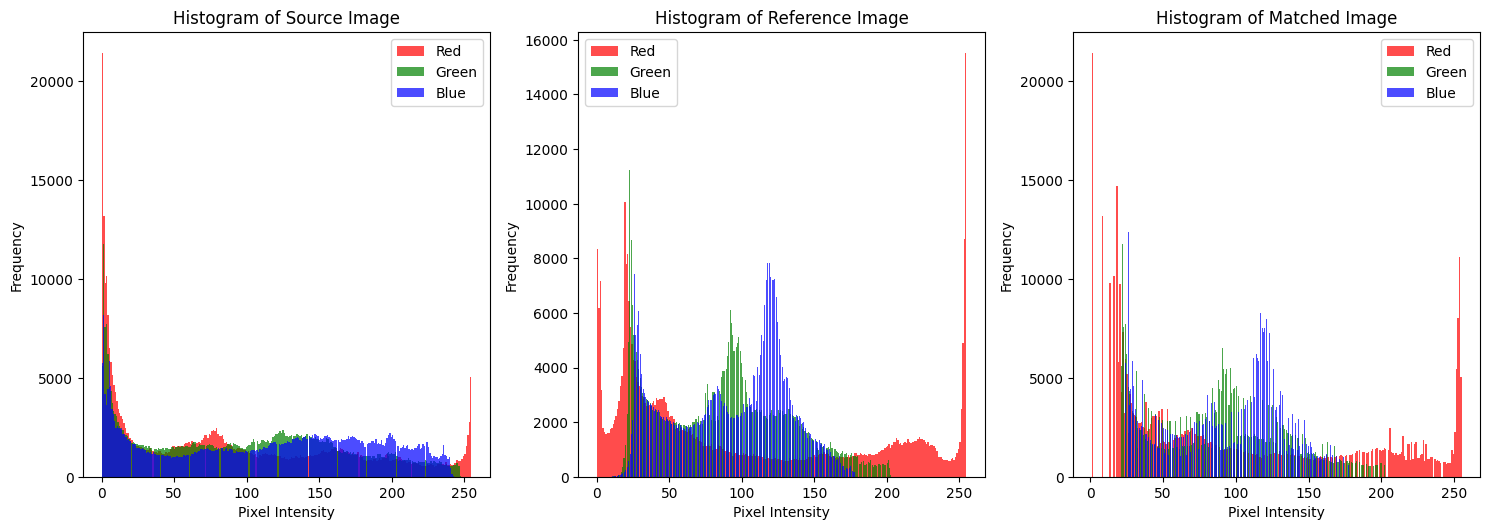

In [47]:
def plot_histograms(image, title, subplot_position):
    # Plot histograms for R, G, and B channels
    plt.subplot(2, 3, subplot_position)
    plt.hist(image[..., 0].ravel(), bins=256, color='red', alpha=0.7, label='Red')
    plt.hist(image[..., 1].ravel(), bins=256, color='green', alpha=0.7, label='Green')
    plt.hist(image[..., 2].ravel(), bins=256, color='blue', alpha=0.7, label='Blue')
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()

plt.figure(figsize=(15, 10))
plot_histograms(source, "Histogram of Source Image", 1)
plot_histograms(reference, "Histogram of Reference Image", 2)
plot_histograms(matched_image, "Histogram of Matched Image", 3)

plt.tight_layout()
plt.show()

## **Interpretation of Combined Histograms:**

- The combined histograms show the distribution of pixel intensities across the three color channels (Red, Green, Blue) for the source, reference, and histogram-matched images.

- The source image has a relatively flat distribution across all three channels, indicating a lack of significant color dominance, with peak intensity values being relatively low, suggesting a generally darker image.

- The reference image has a more pronounced peak in the green channel, indicating a higher proportion of green pixels. The red and blue channels show a balanced distribution, resulting in a brighter overall intensity compared to the source image.

- The matched image closely resembles the reference image in terms of peak intensity and distribution. The green channel shows a more dominant peak, and the red and blue channels also match the reference image, indicating a successful color transformation.

- The histogram matching technique has successfully aligned the color distribution of the source image with the reference image, resulting in a similar color palette and intensity range.

- Histogram matching works by redistributing pixel intensities across the color channels, which modifies the overall color appearance of the image.

## **Comparing Histograms of Matched Image and Reference Image by Channel:**

## **Wasserstein Distance in Histogram Matching:**

- In the context of **histogram matching**, the Wasserstein Distance measures the "effort" required to transform the pixel intensity distribution of one image to match that of a reference image.
  
- In histogram matching, the goal is to modify the pixel intensities of a source image so that its histogram closely matches the histogram of a reference image. The **Wasserstein Distance** evaluates how similar these two histograms are. It computes the minimum "work" needed to move the distribution of pixel intensities in the source image to match the reference image. 

- The evaluation condition for **Wasserstein Distance** is that the smaller the distance, the more similar the two histograms are. A **distance of 0** implies that the histograms are identical, indicating that the color or intensity distribution of the source image matches the reference image perfectly. 

- Thus, in histogram matching, a **lower Wasserstein Distance** suggests a successful transformation of the source image's histogram to closely resemble the reference image's histogram. This makes Wasserstein Distance a crucial tool in tasks like image enhancement and color matching.

In [46]:
from scipy.stats import wasserstein_distance
def compare_histograms(image1, image2, channel_name):
    hist1 = np.histogram(image1, bins=256, range=(0, 256), density=True)[0]
    hist2 = np.histogram(image2, bins=256, range=(0, 256), density=True)[0]

    distance = wasserstein_distance(hist1, hist2)
    print(f"{channel_name} Channel - Wasserstein Distance: {distance:.4f}")
    return distance

# Comparing histograms for each RGB channel
print("Comparing histograms of Matched Image and Reference Image:")

red_distance = compare_histograms(matched_image[..., 0], reference[..., 0], "Red")# Red channel comparison
green_distance = compare_histograms(matched_image[..., 1], reference[..., 1], "Green")# Green channel comparison
blue_distance = compare_histograms(matched_image[..., 2], reference[..., 2], "Blue")# Blue channel comparison

Comparing histograms of Matched Image and Reference Image:
Red Channel - Wasserstein Distance: 0.0009
Green Channel - Wasserstein Distance: 0.0005
Blue Channel - Wasserstein Distance: 0.0004


In [48]:
print("\nConclusion:")
if red_distance < 0.05 and green_distance < 0.05 and blue_distance < 0.05:
    print("The histograms of the Matched Image and Reference Image are closely aligned across all RGB channels.")
else:
    print("The histograms of the Matched Image and Reference Image are not perfectly matched. There are differences in one or more RGB channels.")


Conclusion:
The histograms of the Matched Image and Reference Image are closely aligned across all RGB channels.


## **Cosine Similarity in Histogram Matching:**
**Cosine Similarity** is another metric used to compare two histograms. It measures the cosine of the angle between two vectors, where each vector represents the intensity distribution of an image. When applied to histogram matching, **Cosine Similarity** evaluates the degree to which the histograms of the source and reference images align in terms of their pixel intensity distributions.

In histogram matching, the **Cosine Similarity** value ranges from -1 to 1:

- **1** means the histograms are identical or perfectly aligned, indicating that the source image's intensity distribution exactly matches the reference image.
- **0** means the histograms are orthogonal, suggesting no similarity between the distributions.
- **-1** indicates the histograms are completely opposite.

In the context of histogram matching, **higher Cosine Similarity** values indicate a better match between the histograms, meaning the source image's pixel intensity distribution is closely aligned with that of the reference image. This is particularly useful in evaluating the effectiveness of color and tonal adjustments made during the matching process.

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

def compare_histograms_cosine(image1, image2, channel_name):
    # Compute the normalized histograms for both images
    hist1 = np.histogram(image1, bins=256, range=(0, 256), density=True)[0]
    hist2 = np.histogram(image2, bins=256, range=(0, 256), density=True)[0]

    # Reshape the histograms into 2D arrays (for cosine similarity computation)
    hist1 = hist1.reshape(1, -1)
    hist2 = hist2.reshape(1, -1)

    # Calculate Cosine Similarity between the histograms
    similarity = cosine_similarity(hist1, hist2)[0][0]
    print(f"{channel_name} Channel - Cosine Similarity: {similarity:.4f}")
    return similarity

print("Comparing histograms of Matched Image and Reference Image using Cosine Similarity:")

# Comparing histograms for each RGB channel
red_similarity = compare_histograms_cosine(matched_image[..., 0], reference[..., 0], "Red")  # Red channel comparison
green_similarity = compare_histograms_cosine(matched_image[..., 1], reference[..., 1], "Green")  # Green channel comparison
blue_similarity = compare_histograms_cosine(matched_image[..., 2], reference[..., 2], "Blue")  # Blue channel comparison


Comparing histograms of Matched Image and Reference Image using Cosine Similarity:
Red Channel - Cosine Similarity: 0.7163
Green Channel - Cosine Similarity: 0.9438
Blue Channel - Cosine Similarity: 0.9589


## **Interpretation:**

- **Wasserstein Distance**: The very small values (Red: 0.0009, Green: 0.0005, Blue: 0.0004) indicate a successful histogram matching with minimal differences between the matched and reference images.
- **Cosine Similarity**: High values (Red: 0.7163, Green: 0.9438, Blue: 0.9589) demonstrate excellent alignment of the histograms, with the green and blue channels showing very strong similarity.


## **e) Download the image ‘dancing_kid.jpg’ and add it to the matched image.**

In [18]:
from skimage import img_as_float, exposure
from skimage.util import img_as_ubyte

In [19]:
# Convert images to float for blending
matched_image_float = img_as_float(matched_image)
dancing_kid_float = img_as_float(dancing_kid)

## **Reason:**
- Pixel values in images are typically stored as **uint8 integers** ranging from 0 to 255.
- Arithmetic operations on integer pixel values can result in **overflow or clipping**, distorting the final blended image.
- Converting images to **float** normalizes pixel values to a range of [0, 1], eliminating risks of overflow and clipping.
- Float representation ensures **smooth and mathematically accurate blending operations**.
- Higher precision in float calculations captures **subtle differences in pixel intensity**, preserving image details.


In [33]:
# Print the dimensions of both images
print("Matched Image Dimensions:", matched_image_float.shape)
print("Dancing Kid Image Dimensions:", dancing_kid_float.shape)

if matched_image_float.shape != dancing_kid_float.shape:
    print("Resizing is needed.")
    dancing_kid_resized = resize(dancing_kid_float, matched_image_float.shape, anti_aliasing=True)

else:
    print("No resizing needed. The images are already the same size.")
    dancing_kid_resized = dancing_kid_float

Matched Image Dimensions: (782, 517, 3)
Dancing Kid Image Dimensions: (302, 242, 3)
Resizing is needed.


In [35]:
# Blend the images (simple averaging technique)
final_image = (matched_image_float + dancing_kid_resized) / 2
# Convert back to uint8 for display
final_image = img_as_ubyte(final_image)

## **f) Display the final image.**

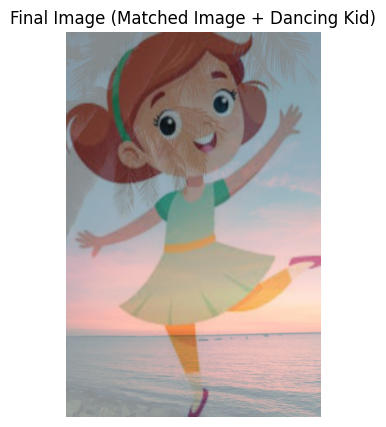

In [36]:
# Display the Final Image
plt.figure(figsize=(10, 5))
plt.imshow(final_image)
plt.title("Final Image (Matched Image + Dancing Kid)")
plt.axis('off')
plt.show()

## **Interpretation:**

- The final image successfully blends the "Matched Image" and the "Dancing Kid" image, creating a visually harmonious overlay. The two images integrate smoothly, showing the strength of the blending process.

- The background of the matched image is retained while the "Dancing Kid" graphic remains prominently visible. This demonstrates that the resizing and alignment processes were executed properly, ensuring that both images fit together correctly.

- The transparency effect applied to the images allows both to be seen clearly, ensuring that neither dominates the composition. This highlights the effectiveness of the blending algorithm in achieving a balanced visual result.

- The colors of the "Dancing Kid" image integrate seamlessly with those of the matched image, indicating that successful color blending was achieved without any noticeable artifacts.

- The final image appears natural and balanced, suggesting that the histogram matching and blending procedures were effectively applied. The alignment of the images and the overall appearance reflect the successful execution of the task.

- Visual inspection confirms that resizing the "Dancing Kid" image to match the dimensions of the matched image was essential for achieving proper alignment and ensuring that both images would fit together properly.

- The blending operation provided a smooth transition between the two images, emphasizing the compatibility of their histograms. This suggests that both images were well-prepared for blending.

- The blending approach used (e.g., averaging the pixel values) appears to be suitable for this task, as the result shows a harmonious and natural integration of the two images.

- The final composition highlights the versatility of image processing techniques such as histogram matching and blending in creating seamless overlays. These methods can be highly effective for combining different image sources into a cohesive final image.


In [37]:
def plot_histograms(image, title):
    # Plot histograms for Red, Green, and Blue channels
    plt.hist(image[..., 0].ravel(), bins=256, color='red', alpha=0.7, label='Red')
    plt.hist(image[..., 1].ravel(), bins=256, color='green', alpha=0.7, label='Green')
    plt.hist(image[..., 2].ravel(), bins=256, color='blue', alpha=0.7, label='Blue')
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()

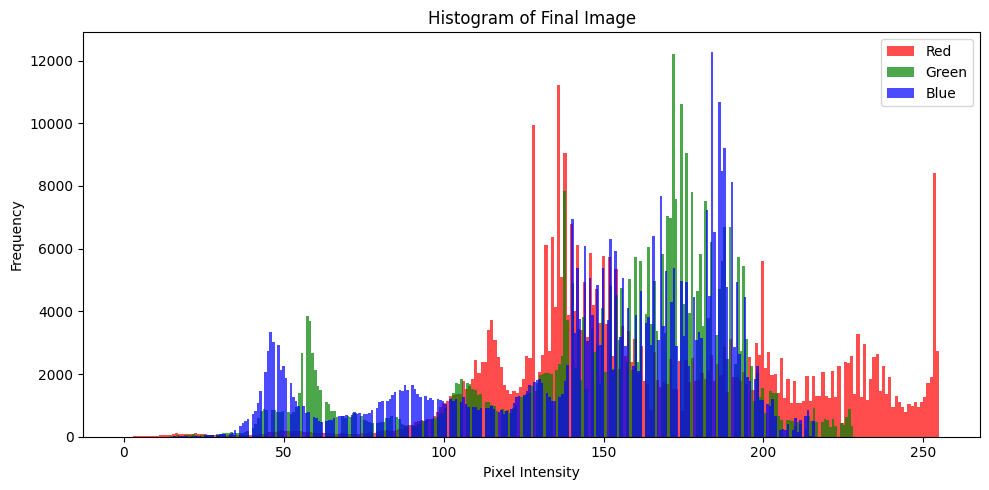

In [38]:
# Display the Histogram of the Final Image
plt.figure(figsize=(10, 5))
plot_histograms(final_image, "Histogram of Final Image")
plt.tight_layout()
plt.show()

## **Interpretation:**

- The histogram of the final image clearly shows the distribution of pixel intensities for each color channel (Red, Green, and Blue).

- The red channel has a relatively higher frequency of pixel values between 150 and 250, indicating a stronger presence of red tones in that intensity range.

- The green channel's histogram shows a peak around the lower intensity values, indicating that green pixels are more prominent in the darker regions of the image.

- The blue channel displays a wider distribution, especially in the higher intensity range, which suggests that blue pixels dominate in the brighter areas of the image.

- The overlapping of the histograms for the three channels indicates some level of color mixture, suggesting the blending of the "Dancing Kid" and "Matched Image" affected the overall color balance.

- The histogram shows distinct peaks for each color channel, implying that the final image has significant color variance and is not overly uniform, which is typical in complex images.

- The frequency of pixel intensities is generally balanced across the three channels, suggesting that the blending process preserved the color characteristics of both images.

- The large spikes in the histograms reflect the presence of certain dominant pixel intensities, which can result from either the original or the matched image depending on their respective histograms.

- Overall, the histogram analysis confirms that the final image maintains a diverse color range, with each color channel contributing distinctively to the image's overall appearance.


## **Conclusion:**

The histogram matching process was successfully applied to adjust the tonal distribution of the source image to match the reference image. The histograms of the source and reference images were compared across the RGB channels, and the results indicated how closely the histograms aligned. The process demonstrated the effectiveness of histogram matching in transforming an image's appearance to match a desired reference.

The final result was a composite image where the histogram-matched image was blended with another image (`dancing_kid.jpg`), showcasing how image blending can be used to combine multiple images while maintaining the tonal consistency achieved through histogram matching. This technique can be widely applied in image processing tasks such as image enhancement, style transfer, and content manipulation.
